<a href="https://colab.research.google.com/github/anisha98/DataMiningCSCI5521/blob/main/DataMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
!pip install plotly

In [282]:
import numpy as np
import pandas as pd

# Plotly Packages
from plotly import subplots
import plotly.graph_objs as go

In [283]:
from google.colab import drive

In [284]:
url = 'insurance.csv'
insurance_data = pd.read_csv(url)
insurance_data1 = insurance_data
insurance_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Preprocessing

In [285]:
charges = insurance_data["charges"].values
logcharge = np.log(insurance_data["charges"])
fig = go.Figure(data=[go.Histogram(x=charges, histnorm='probability',name="Charges",marker = dict(color = '#FA5858',))])
fig['layout'].update(showlegend=True, title='Charges', bargap=0.05)
fig.show(renderer="colab")

fig = go.Figure(data=[go.Histogram(x=logcharge, histnorm='probability',name="Normalised charges using Log",marker = dict(color = '#58FA82',))])
fig['layout'].update(showlegend=True, title='Normalised charges using Log', bargap=0.05)
fig.show(renderer="colab")

In [286]:
insurance_data['chargesLog'] = np.log(insurance_data["charges"])

In [287]:
insurance_data['chargesLog'].describe()

count    1338.000000
mean        9.098659
std         0.919527
min         7.022756
25%         8.463853
50%         9.146552
75%         9.719558
max        11.063045
Name: chargesLog, dtype: float64

In [288]:
insurance_data['discretized_age'] = np.nan
data_list = [insurance_data]

for column in data_list:
    column.loc[(column['age'] >= 18) & (column['age'] <= 35), 'discretized_age'] = 'Young Adult'
    column.loc[(column['age'] > 35) & (column['age'] <= 55), 'discretized_age'] = 'Senior Adult'
    column.loc[column['age'] > 55, 'discretized_age'] = 'Elder'
    
    
labels = insurance_data["discretized_age"].unique().tolist()
amount = insurance_data["discretized_age"].value_counts().tolist()

colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

fig = go.Figure(data=[go.Pie(labels=labels, values=amount,
                hoverinfo='label+percent', textinfo='value', 
                textfont=dict(size=20),
                marker=dict(colors=colors, 
                            line=dict(color='#000000', width=2)))])
fig['layout'].update(showlegend=True, title='Discretization of ages')
fig.show(renderer="colab")

In [289]:
# import plotly.figure_factory as ff
# bmi = [insurance_data["bmi"].values.tolist()]
# group_labels = ['Body Mass Index Distribution']

# colors = ['#FA5858']

# fig = ff.create_distplot(bmi, group_labels, colors=colors)
# # Add title
# fig['layout'].update(title='Normal Distribution <br> Central Limit Theorem Condition')

# iplot(fig, filename='Basic Distplot')

In [290]:
insurance_data['discretized_bmi'] = np.nan
data_list = [insurance_data]

for column in data_list:
    column.loc[(column['bmi']) < 18.5, 'discretized_bmi'] = "Under Weight"
    column.loc[(column['bmi'] >= 18.5) & (column['bmi'] < 24.9), 'discretized_bmi'] = 'Healthy'
    column.loc[(column['bmi'] >= 25.0) & (column['bmi'] < 29.9), 'discretized_bmi'] = 'Over Weight'
    column.loc[column['bmi'] >= 30.0 , 'discretized_bmi'] = 'Obese'
    
    
labels = insurance_data["discretized_bmi"].unique().tolist()
amount = insurance_data["discretized_bmi"].value_counts().tolist()

colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

fig = go.Figure(data=[go.Pie(labels=labels, values=amount,
                hoverinfo='label+percent', textinfo='value', 
                textfont=dict(size=20),
                marker=dict(colors=colors, 
                            line=dict(color='#000000', width=2)))])
fig['layout'].update(showlegend=True, title='Discretization of BMI')
fig.show(renderer="colab")

In [291]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176,Young Adult,Over Weight
1,18,male,33.770,1,no,southeast,1725.55230,7.453302,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,8.400538,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,9.998092,Young Adult,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,8.260197,Young Adult,Over Weight


# Missing Values

In [292]:
insurance_data.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
region              0
charges             0
chargesLog          0
discretized_age     0
discretized_bmi    15
dtype: int64

# Convert all the columns into numerical values

In [293]:
replace_dict= {0:'female',1:'male'}
data = insurance_data.copy()
insurance_data['sex'] = insurance_data['sex'].map(dict(zip(['male','female'],[0,1])))
insurance_data['smoker'] = insurance_data['smoker'].map(dict(zip(['no','yes'],[0,1])))
insurance_data['region'] = insurance_data['region'].map(dict(zip(['southwest','southeast','northwest','northeast'],[1,2,3,4])))
insurance_data['discretized_age_0'] = insurance_data['discretized_age'].map(dict(zip(['Young Adult','Senior Adult','Elder'],[0,1,2])))

In [294]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0
0,19,1,27.900,0,1,1,16884.92400,9.734176,Young Adult,Over Weight,0
1,18,0,33.770,1,0,2,1725.55230,7.453302,Young Adult,Obese,0
2,28,0,33.000,3,0,2,4449.46200,8.400538,Young Adult,Obese,0
3,33,0,22.705,0,0,3,21984.47061,9.998092,Young Adult,Healthy,0
4,32,0,28.880,0,0,3,3866.85520,8.260197,Young Adult,Over Weight,0


# Heat Map

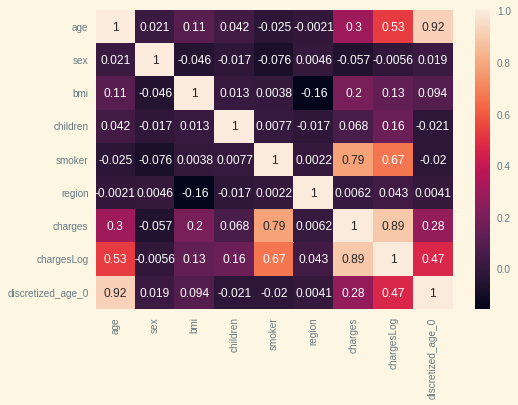

In [295]:
import seaborn as sns
corrMatrix = insurance_data.corr()
sns.heatmap(corrMatrix,annot=True)

In [296]:
from plotly import subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

corr = insurance_data.corr()
corr = corr.round(3)
print(type(corr))


ff.create_annotated_heatmap(z=corr.to_numpy(),
            x=corr.columns.tolist(),
            y=corr.index.tolist(),
            zmax=1, zmin=-1,
            showscale=True,
            hoverongaps=True)


<class 'pandas.core.frame.DataFrame'>


We observe that patient charges are highly correlated with smoker and age

We now oberserve how the smoker attribute affects the patients charges with other attributes

In [297]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0
0,19,1,27.900,0,1,1,16884.92400,9.734176,Young Adult,Over Weight,0
1,18,0,33.770,1,0,2,1725.55230,7.453302,Young Adult,Obese,0
2,28,0,33.000,3,0,2,4449.46200,8.400538,Young Adult,Obese,0
3,33,0,22.705,0,0,3,21984.47061,9.998092,Young Adult,Healthy,0
4,32,0,28.880,0,0,3,3866.85520,8.260197,Young Adult,Over Weight,0


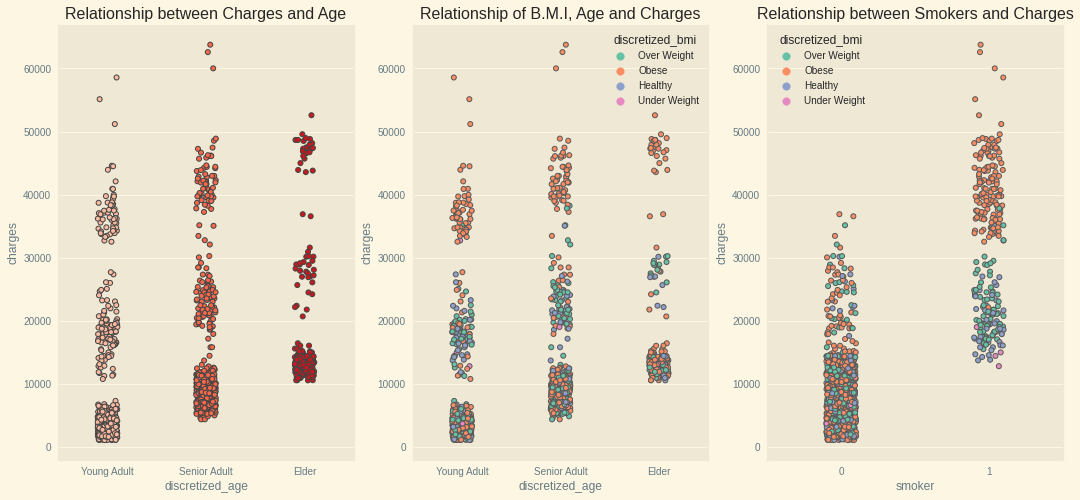

In [298]:
import matplotlib.pyplot as plt

f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,8))

sns.stripplot(x="discretized_age", y="charges", data=insurance_data, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Charges and Age")


sns.stripplot(x="discretized_age", y="charges", hue="discretized_bmi", data=insurance_data, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("Relationship of B.M.I, Age and Charges")

sns.stripplot(x="smoker", y="charges", hue="discretized_bmi", data=insurance_data, ax=ax3, linewidth=1, palette="Set2")
ax3.set_title("Relationship between Smokers and Charges")

plt.show()

We can observe that people who smoke are charged more than people who don't smoke irrespective of their B.M.I categories

Text(0.5, 1.0, 'Relationship between Charges and BMI by Smoking Condition')

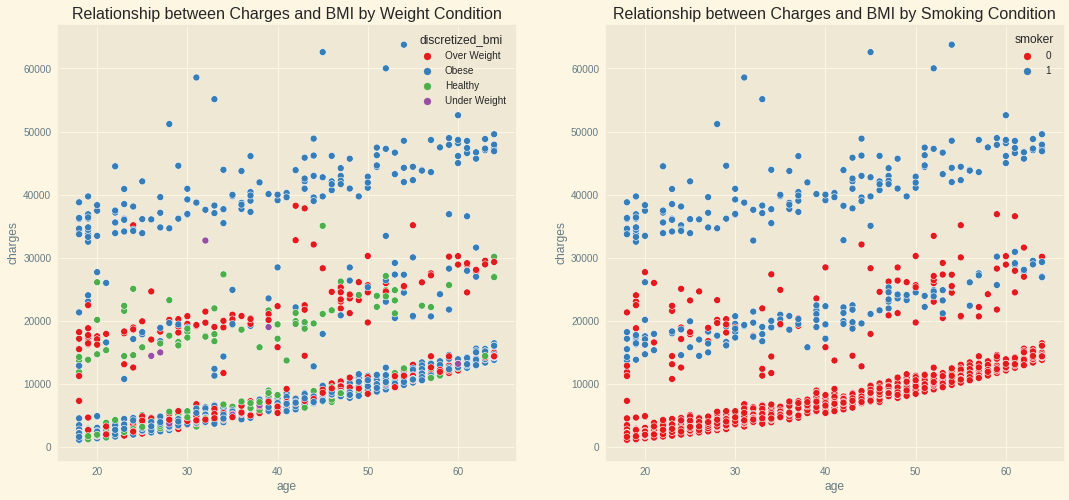

In [299]:
# Two subplots one with weight condition and the other with smoker.

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))
sns.scatterplot(x="age", y="charges", hue="discretized_bmi", data=insurance_data, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by Weight Condition")
# ax1.annotate('Obese Cluster \n (Does this cluster has \n the Smoking Attribute?)', xy=(1, 1), xytext=(1, 1),
#             arrowprops=dict(facecolor='black'),
#             fontsize=12)
sns.scatterplot(x="age", y="charges", hue="smoker", data=insurance_data, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and BMI by Smoking Condition")
# ax2.annotate('Obese Smoker Cluster ', xy=(1, 1), xytext=(1, 1),
#             arrowprops=dict(facecolor='black'),
#             fontsize=12)
# ax2.annotate('The Impact of Smoking to \n Charges on other \n Weight Conditions ', xy=(26, 7), xytext=(1, 1),
#             arrowprops=dict(facecolor='black'),
#             fontsize=12)

In [300]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0
0,19,1,27.900,0,1,1,16884.92400,9.734176,Young Adult,Over Weight,0
1,18,0,33.770,1,0,2,1725.55230,7.453302,Young Adult,Obese,0
2,28,0,33.000,3,0,2,4449.46200,8.400538,Young Adult,Obese,0
3,33,0,22.705,0,0,3,21984.47061,9.998092,Young Adult,Healthy,0
4,32,0,28.880,0,0,3,3866.85520,8.260197,Young Adult,Over Weight,0


In [301]:
avg_ya_charge = insurance_data["charges"].loc[insurance_data["discretized_age"] == "Young Adult"].mean()
avg_sa_charge = insurance_data["charges"].loc[insurance_data["discretized_age"] == "Senior Adult"].mean()
avg_e_charge = insurance_data["charges"].loc[insurance_data["discretized_age"] == "Elder"].mean()

# Median
med_ya_charge = insurance_data["charges"].loc[insurance_data["discretized_age"] == "Young Adult"].median()
med_sa_charge = insurance_data["charges"].loc[insurance_data["discretized_age"] == "Senior Adult"].median()
med_e_charge = insurance_data["charges"].loc[insurance_data["discretized_age"] == "Elder"].median()

average_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[avg_ya_charge, avg_sa_charge, avg_e_charge],
    name='Mean',
    marker=dict(
        color="#F5B041"
    )
)
med_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[med_ya_charge, med_sa_charge, med_e_charge],
    name='Median',
    marker=dict(
        color="#48C9B0"
    )
)


fig = subplots.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Average Charge by Age','Median Charge by Age'),
                         shared_yaxes=True, print_grid=False)


fig.append_trace(average_plot, 1, 1)
fig.append_trace(med_plot, 1, 2)


fig['layout'].update(showlegend=True, title='Age Charges', xaxis=dict(title="Age Category"), yaxis=dict(title="Patient Charges"), bargap=0.15)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [302]:
avg_ya_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Overweight"].mean()
avg_sa_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Obese"].mean()
avg_e_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Healthy"].mean()
avg_u_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Underweight"].mean()

# Median
med_ya_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Overweight"].median()
med_sa_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Obese"].median()
med_e_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Healthy"].median()
med_u_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Underweight"].median()

average_plot = go.Bar(
    x=['Overweight', 'Obese', 'Healthy', 'Underweight'],
    y=[avg_ya_charge, avg_sa_charge, avg_e_charge,avg_u_charge],
    name='Mean',
    marker=dict(
        color="#F5B041"
    )
)
med_plot = go.Bar(
    x=['Overweight', 'Obese', 'Healthy', 'Underweight'],
    y=[med_ya_charge, med_sa_charge, med_e_charge, med_u_charge],
    name='Median',
    marker=dict(
        color="#48C9B0"
    )
)


fig = subplots.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Average Charge by BMI','Median Charge by BMI'),
                         shared_yaxes=True, print_grid=False)


fig.append_trace(average_plot, 1, 1)
fig.append_trace(med_plot, 1, 2)


fig['layout'].update(showlegend=True, title='BMI Charges', xaxis=dict(title="BMI Category"), yaxis=dict(title="Patient Charges"), bargap=0.15)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [303]:
chargedist_sm = insurance_data["charges"].loc[(insurance_data["discretized_bmi"] == "Obese") & (insurance_data["smoker"] == 1)].values
chargedist_nsm = insurance_data["charges"].loc[(insurance_data["discretized_bmi"] == "Obese") & (insurance_data["smoker"] == 0)].values

trace0 = go.Box(
    y=chargedist_sm,
    name = 'Obese Smokers',
    marker = dict(
        color = '#DF0101',
    )
)
trace1 = go.Box(
    y=chargedist_nsm,
    name = 'Obese Non-Smokers',
    marker = dict(
        color = '#00FF40',
    )
)


data = [trace0, trace1]


layout = dict(title="Deeper Look into Obese condition by Smoking status",
             xaxis=dict(
             title="Status",
             titlefont=dict(
             size=16)),
             yaxis=dict(title="Patient Charges",
                       titlefont=dict(size=16)),
              )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [304]:
obese_smoker = insurance_data.loc[(insurance_data["discretized_bmi"] == "Obese") & (insurance_data["smoker"] == 1)]
obese_nonsmoker = insurance_data.loc[(insurance_data["discretized_bmi"] == "Obese") & (insurance_data["smoker"] == 0)]


trace0 = go.Scatter(
    x = obese_smoker["age"].values,
    y = obese_smoker["charges"].values,
    name = 'Smokers',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = '#DF0101',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = obese_nonsmoker["age"].values,
    y = obese_nonsmoker["charges"].values,
    name = 'Non-Smokers',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = '#00FF40',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Clear Separation between Obese Smokers and Non-Smokers in Charges',
              yaxis = dict(zeroline = False,
                          title="Patient Charges",
                          titlefont=dict(size=16)),
              xaxis = dict(zeroline = False,
                          title="Age of the Patient",
                          titlefont=dict(
                          size=16))
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

Regional Analysis

In [305]:
avg_ya_charge = insurance_data["charges"].loc[insurance_data["region"] == 1].mean()
avg_sa_charge = insurance_data["charges"].loc[insurance_data["region"] == 2].mean()
avg_e_charge = insurance_data["charges"].loc[insurance_data["region"] == 3].mean()
avg_u_charge = insurance_data["charges"].loc[insurance_data["region"] == 4].mean()

# Median
med_ya_charge = insurance_data["charges"].loc[insurance_data["region"] == 1].median()
med_sa_charge = insurance_data["charges"].loc[insurance_data["region"] == 2].median()
med_e_charge = insurance_data["charges"].loc[insurance_data["region"] == 3].median()
med_u_charge = insurance_data["charges"].loc[insurance_data["region"] == 4].median()

average_plot = go.Bar(
    x=['SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'],
    y=[avg_ya_charge, avg_sa_charge, avg_e_charge,avg_u_charge],
    name='Mean',
    marker=dict(
        color="#F5B041"
    )
)
med_plot = go.Bar(
    x=['SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'],
    y=[med_ya_charge, med_sa_charge, med_e_charge, med_u_charge],
    name='Median',
    marker=dict(
        color="#48C9B0"
    )
)


fig = subplots.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Average Charge by Region','Median Charge by Region'),
                         shared_yaxes=True, print_grid=False)


fig.append_trace(average_plot, 1, 1)
fig.append_trace(med_plot, 1, 2)


fig['layout'].update(showlegend=True, title='Region Charges', xaxis=dict(title="Region Category"), yaxis=dict(title="Patient Charges"), bargap=0.15)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

Text(0.5, 1.0, 'Region = NorthEast')

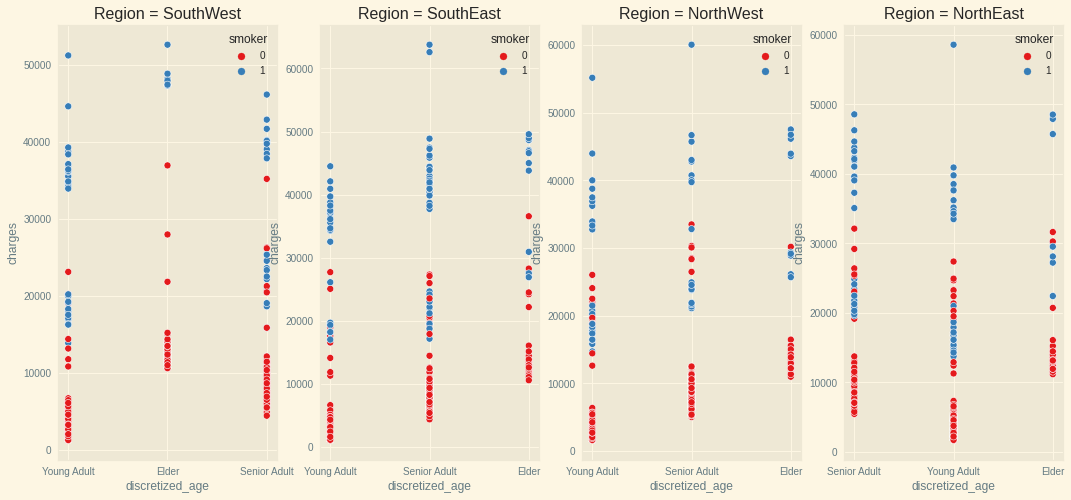

In [306]:
# Two subplots one with weight condition and the other with smoker.

f, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(18,8))
region1 = insurance_data.loc[insurance_data["region"] == 1]
region2 = insurance_data.loc[insurance_data["region"] == 2]
region3 = insurance_data.loc[insurance_data["region"] == 3]
region4 = insurance_data.loc[insurance_data["region"] == 4]
sns.scatterplot(x="discretized_age", y="charges", hue="smoker", data=region1, palette="Set1", ax=ax1)
ax1.set_title("Region = SouthWest")

sns.scatterplot(x="discretized_age", y="charges", hue="smoker", data=region2, palette="Set1", ax=ax2)
ax2.set_title("Region = SouthEast")

sns.scatterplot(x="discretized_age", y="charges", hue="smoker", data=region3, palette="Set1", ax=ax3)
ax3.set_title("Region = NorthWest")

sns.scatterplot(x="discretized_age", y="charges", hue="smoker", data=region4, palette="Set1", ax=ax4)
ax4.set_title("Region = NorthEast")
# ax2.annotate('Obese Smoker Cluster ', xy=(1, 1), xytext=(1, 1),
#             arrowprops=dict(facecolor='black'),
#             fontsize=12)
# ax2.annotate('The Impact of Smoking to \n Charges on other \n Weight Conditions ', xy=(26, 7), xytext=(1, 1),
#             arrowprops=dict(facecolor='black'),
#             fontsize=12)

In [307]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0
0,19,1,27.900,0,1,1,16884.92400,9.734176,Young Adult,Over Weight,0
1,18,0,33.770,1,0,2,1725.55230,7.453302,Young Adult,Obese,0
2,28,0,33.000,3,0,2,4449.46200,8.400538,Young Adult,Obese,0
3,33,0,22.705,0,0,3,21984.47061,9.998092,Young Adult,Healthy,0
4,32,0,28.880,0,0,3,3866.85520,8.260197,Young Adult,Over Weight,0


In [308]:
insurance_data["discretized_bmi"].unique()

# Average charges for overweight patients by region 
sw_overweight = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 1) & (insurance_data["discretized_bmi"] == "Over Weight")].values)
se_overweight = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 2) & (insurance_data["discretized_bmi"] == "Over Weight")].values)
nw_overweight = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 3) & (insurance_data["discretized_bmi"] == "Over Weight")].values)
ne_overweight = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 4) & (insurance_data["discretized_bmi"] == "Over Weight")].values)

# Obese
sw_obese = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 1) & (insurance_data["discretized_bmi"] == "Obese")].values)
se_obese = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 2) & (insurance_data["discretized_bmi"] == "Obese")].values)
nw_obese = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 3) & (insurance_data["discretized_bmi"] == "Obese")].values)
ne_obese = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 4) & (insurance_data["discretized_bmi"] == "Obese")].values)

# Normal Weight
sw_nw = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 1) & (insurance_data["discretized_bmi"] == "Healthy")].values)
se_nw = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 2) & (insurance_data["discretized_bmi"] == "Healthy")].values)
nw_nw = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 3) & (insurance_data["discretized_bmi"] == "Healthy")].values)
ne_nw = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 4) & (insurance_data["discretized_bmi"] == "Healthy")].values)

# Underweight
sw_uw = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 1) & (insurance_data["discretized_bmi"] == "Under Weight")].values)
se_uw = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 2) & (insurance_data["discretized_bmi"] == "Under Weight")].values)
nw_uw = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 3) & (insurance_data["discretized_bmi"] == "Under Weight")].values)
ne_uw = np.mean(insurance_data["charges"].loc[(insurance_data["region"] == 4) & (insurance_data["discretized_bmi"] == "Under Weight")].values)

# Labels
weight_labels = insurance_data["discretized_bmi"].unique().tolist()

# List per weight condition
sw_weights = [sw_overweight, sw_obese, sw_nw, sw_uw]
se_weights = [se_overweight, se_overweight, se_nw, se_uw]
nw_weights = [nw_overweight, nw_overweight, nw_nw, nw_uw]
ne_weights = [ne_overweight, ne_overweight, ne_nw, ne_uw]

data = [
    go.Scatterpolar(
        mode="lines+markers",
        r = sw_weights,
        theta = weight_labels,
        fill = 'toself',
        name="SouthWest",
        line=dict(
            color="rgba(0, 128, 128, 0.95)"
        ),
        marker=dict(
            color="rgba(0, 74, 147, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar"
    ),
    go.Scatterpolar(
        mode="lines+markers",
        r = se_weights,
        theta = weight_labels,
        fill = 'toself',
        name="SouthEast",
        line=dict(
            color="rgba(255, 72, 72, 0.95)"
        ),
        marker=dict(
            color="rgba(219, 0, 0, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar2"
    ),
    go.Scatterpolar(
        mode="lines+markers",
        r = nw_weights,
        theta = weight_labels,
        fill = 'toself',
        name="NorthWest",
        line=dict(
            color="rgba(72, 255, 72, 0.95)"
        ),
        marker=dict(
            color="rgba(0, 147, 74, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar3"
    ),
       go.Scatterpolar(
        mode="lines+markers",
        r = ne_weights,
        theta = weight_labels,
        fill = 'toself',
        name="NorthEast",
        line=dict(
            color="rgba(247, 133, 11, 0.95)"
        ),
        marker=dict(
            color="rgba(245, 168, 86, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar4"
    )
]

layout = go.Layout(
    title="Average Patient Charges <br> by Region <br>(Depending on the Patient's Weight Condition)",
    showlegend = False,
     paper_bgcolor = "rgb(252, 234, 161)",
    polar = dict(
      domain = dict(
        x = [0, 0.46],
        y = [0.56, 1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      )
    ),
    polar2 = dict(
      domain = dict(
        x = [0, 0.46],
        y = [0, 0.44]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    ),
    polar3 = dict(
      domain = dict(
       x = [0.54, 1],
        y = [0.56, 1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    ),
        polar4 = dict(
      domain = dict(
        x = [0.54, 1],
        y = [0, 0.44]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    ))

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(height=600, width=600)
iplot(fig, filename='polar/directions')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars



We observe that most of the smokers have to pay higher charges as compared to non smokers and charges are not msotly affected by the BMI but we do observe that obese people have to pay high charges

In [198]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0
0,19,1,27.900,0,1,1,16884.92400,9.734176,Young Adult,Over Weight,0
1,18,0,33.770,1,0,2,1725.55230,7.453302,Young Adult,Obese,0
2,28,0,33.000,3,0,2,4449.46200,8.400538,Young Adult,Obese,0
3,33,0,22.705,0,0,3,21984.47061,9.998092,Young Adult,Healthy,0
4,32,0,28.880,0,0,3,3866.85520,8.260197,Young Adult,Over Weight,0


# Clustering Analysis

Text(17, 40000, 'The Impact of Smoking to \n Charges on other \n Weight Conditions ')

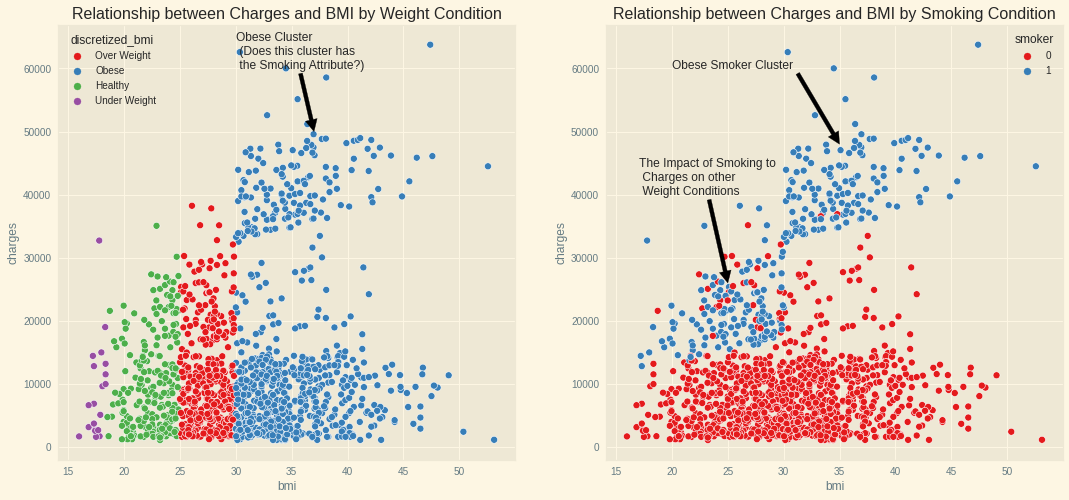

In [199]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="discretized_bmi", data=insurance_data, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by Weight Condition")
ax1.annotate('Obese Cluster \n (Does this cluster has \n the Smoking Attribute?)', xy=(37, 50000), xytext=(30, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=insurance_data, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and BMI by Smoking Condition")
ax2.annotate('Obese Smoker Cluster ', xy=(35, 48000), xytext=(20, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
ax2.annotate('The Impact of Smoking to \n Charges on other \n Weight Conditions ', xy=(25, 26000), xytext=(17, 40000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)

Kmeans

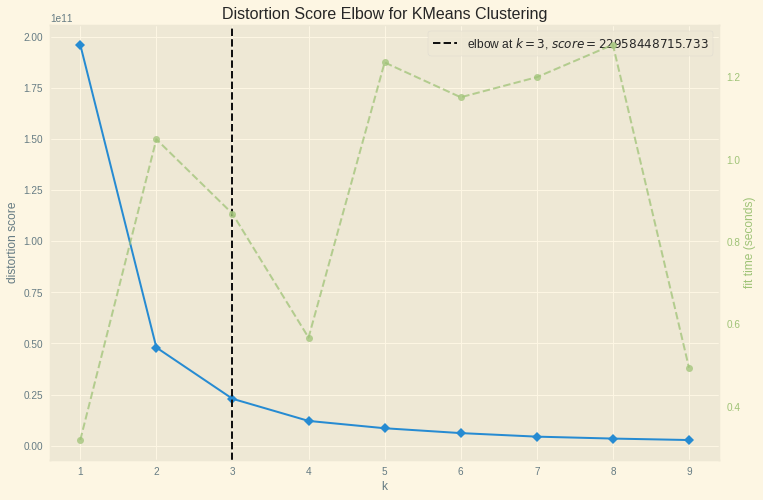

For n_clusters=2, The Silhouette Coefficient is 0.7335587359346507
For n_clusters=3, The Silhouette Coefficient is 0.6071334513989154
For n_clusters=4, The Silhouette Coefficient is 0.6105126830586791
For n_clusters=5, The Silhouette Coefficient is 0.5978396601479187
For n_clusters=6, The Silhouette Coefficient is 0.5690783059350353
For n_clusters=7, The Silhouette Coefficient is 0.5804964738660244
For n_clusters=8, The Silhouette Coefficient is 0.5840008795015061
For n_clusters=9, The Silhouette Coefficient is 0.5591499707576664
For n_clusters=10, The Silhouette Coefficient is 0.5570767277056118


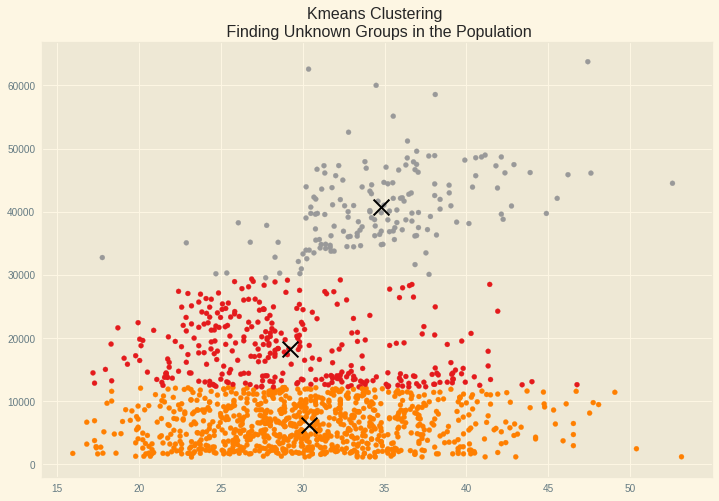

In [200]:
fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
insurance_data.head()
#original_df.head()

X = insurance_data[["bmi","charges"]]
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()  


import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

# print(kmeans.cluster_centers_)

# print(kmeans.labels_)

fig = plt.figure(figsize=(12,8))

kmeans = KMeans(n_clusters=3).fit(X)
label = kmeans.labels_

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

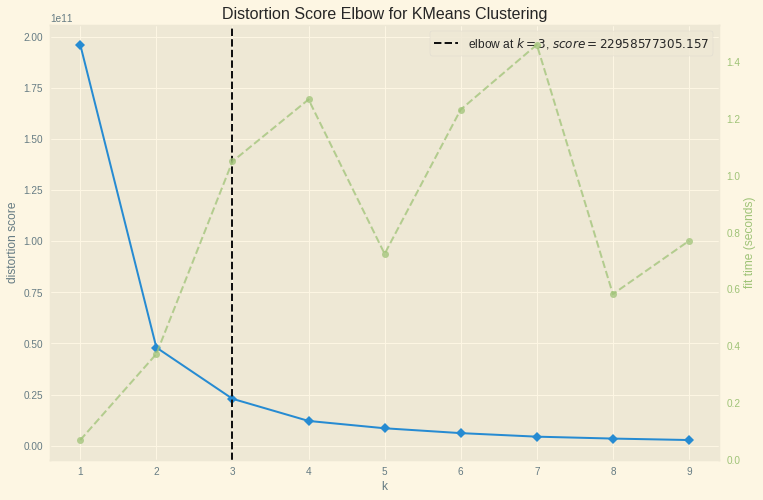

For n_clusters=2, The Silhouette Coefficient is 0.7335598042649139
For n_clusters=3, The Silhouette Coefficient is 0.6028754592692519
For n_clusters=4, The Silhouette Coefficient is 0.6105209058343543
For n_clusters=5, The Silhouette Coefficient is 0.5982765283941346
For n_clusters=6, The Silhouette Coefficient is 0.5690738894814428
For n_clusters=7, The Silhouette Coefficient is 0.5805729029446475
For n_clusters=8, The Silhouette Coefficient is 0.5826726976341664
For n_clusters=9, The Silhouette Coefficient is 0.5611557503747912
For n_clusters=10, The Silhouette Coefficient is 0.5563729786337047


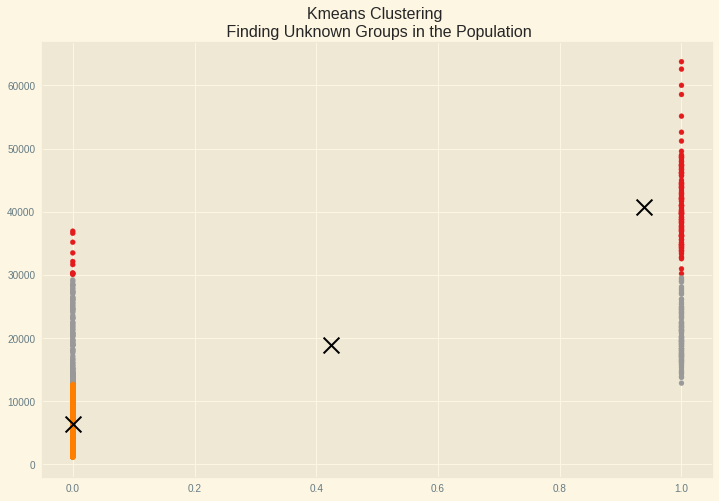

In [201]:
fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
insurance_data.head()
#original_df.head()

X = insurance_data[["smoker","charges"]]
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()  


import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

# print(kmeans.cluster_centers_)

# print(kmeans.labels_)

fig = plt.figure(figsize=(12,8))

kmeans = KMeans(n_clusters=3).fit(X)
label = kmeans.labels_
plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

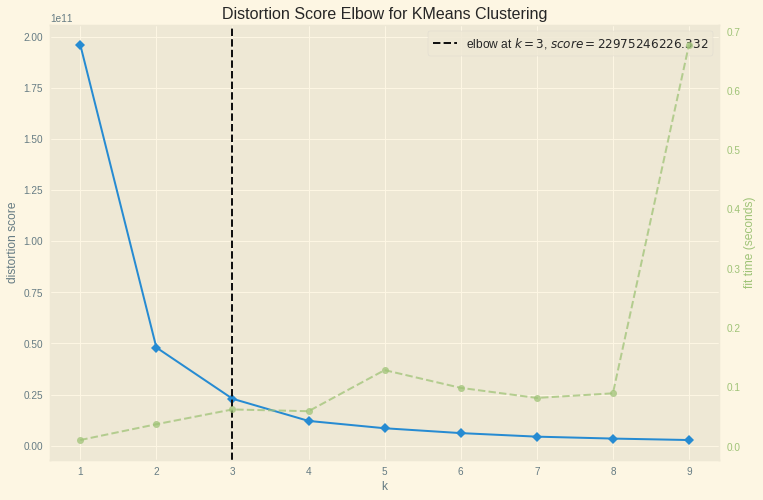

For n_clusters=2, The Silhouette Coefficient is 0.7335578796992449
For n_clusters=3, The Silhouette Coefficient is 0.597918033320565
For n_clusters=4, The Silhouette Coefficient is 0.6105141104306906
For n_clusters=5, The Silhouette Coefficient is 0.5978406527349951
For n_clusters=6, The Silhouette Coefficient is 0.5690586506499274
For n_clusters=7, The Silhouette Coefficient is 0.5799499680403142
For n_clusters=8, The Silhouette Coefficient is 0.5836495295064218
For n_clusters=9, The Silhouette Coefficient is 0.5608755793440336
For n_clusters=10, The Silhouette Coefficient is 0.5591447318348628


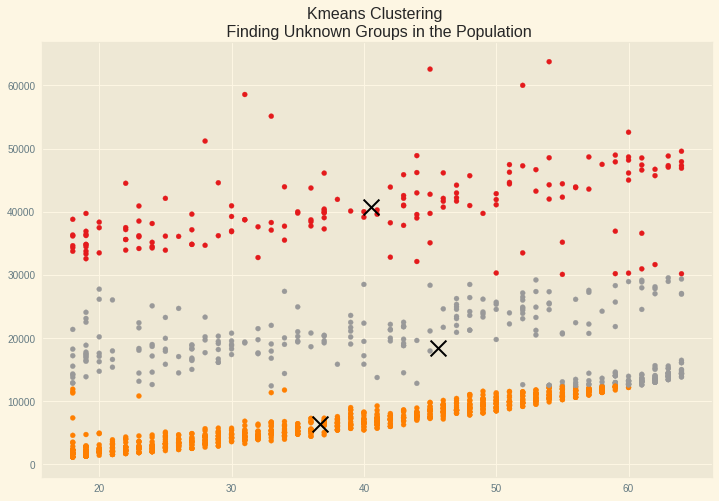

In [202]:
fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
insurance_data.head()
#original_df.head()

X = insurance_data[["age","charges"]]
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()  


import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

# print(kmeans.cluster_centers_)

# print(kmeans.labels_)

fig = plt.figure(figsize=(12,8))

kmeans = KMeans(n_clusters=3).fit(X)
label = kmeans.labels_
plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

In [203]:
!pip install fuzzy-c-means

# Fuzzy C Clustering

In [276]:
import numpy as np
from fcmeans import FCM

In [277]:
my_model = FCM(n_clusters=4) 
my_model.fit(X.to_numpy())
centers = my_model.centers
labels = my_model.predict(X.to_numpy())

for n_cluster in range(2, 11):
    my_model = FCM(n_clusters=n_cluster) 
    my_model.fit(X.to_numpy())
    centers = my_model.centers
    labels = my_model.predict(X.to_numpy())
    sil_coeff = silhouette_score(X, labels, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.7338292256323746
For n_clusters=3, The Silhouette Coefficient is 0.5918404597413414
For n_clusters=4, The Silhouette Coefficient is 0.6088795962339913
For n_clusters=5, The Silhouette Coefficient is 0.5620688573995593
For n_clusters=6, The Silhouette Coefficient is 0.5682777060581543
For n_clusters=7, The Silhouette Coefficient is 0.5762641077079683
For n_clusters=8, The Silhouette Coefficient is 0.5576686124597918
For n_clusters=9, The Silhouette Coefficient is 0.5542154966850967
For n_clusters=10, The Silhouette Coefficient is 0.5498477664934878


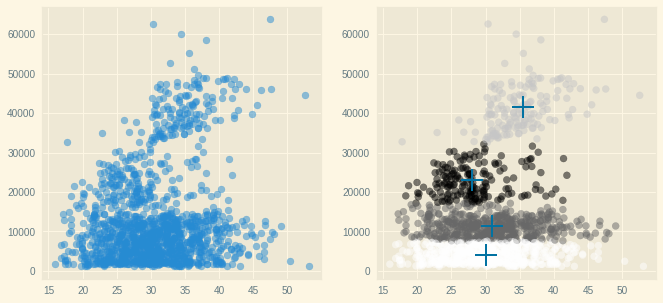

In [278]:
import matplotlib.pyplot as plt
my_model = FCM(n_clusters=4) 
my_model.fit(X.to_numpy())
centers = my_model.centers
labels = my_model.predict(X.to_numpy())
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X.to_numpy()[:,0], X.to_numpy()[:,1], alpha=.5)
axes[1].scatter(X.to_numpy()[:,0], X.to_numpy()[:,1], c=labels, alpha=.5)
axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500,c="b")

In [207]:
# fig = plt.figure(figsize=(12,8))

# # KNears Neighbors 
# insurance_data.head()
# #original_df.head()

# X = insurance_data[["age","charges"]]


# # Instantiate the clustering model and visualizer
# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(1,10))

# visualizer.fit(X)    # Fit the data to the visualizer
# visualizer.poof()  


# kmeans = KMeans(n_clusters=3)  
# kmeans.fit(X)

# print(kmeans.cluster_centers_)

# print(kmeans.labels_)

# fig = plt.figure(figsize=(12,8))

# plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
# plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
# plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
# plt.show()

In [208]:
# g = plt.figure(figsize=(12,8))

# # KNears Neighbors 
# insurance_data.head()
# #original_df.head()

# X = insurance_data[["smoker","charges"]]


# # Instantiate the clustering model and visualizer
# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(1,10))

# visualizer.fit(X)    # Fit the data to the visualizer
# visualizer.poof() 


# kmeans = KMeans(n_clusters=3)  
# kmeans.fit(X)

# print(kmeans.cluster_centers_)

# print(kmeans.labels_)

# fig = plt.figure(figsize=(12,8))

# plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
# plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
# plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
# plt.show()

# Agglomerative Clustering

In [209]:
from sklearn.cluster import AgglomerativeClustering

X = insurance_data[["bmi","charges","smoker","region","age"]]
agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(X)
agglomerative_clustering

AgglomerativeClustering(n_clusters=4)

In [210]:

from scipy.cluster.hierarchy import dendrogram, linkage

# 5% of the data 
sample_df = insurance_data.sample(frac=.05)

sample_X = sample_df[["bmi","charges","smoker","region","age"]]

sample_agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(sample_X)
sample_agglomerative_clustering
for n_cluster in range(2, 11):
    kmeans = AgglomerativeClustering(n_clusters=4).fit(sample_X)
    label = kmeans.labels_
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

linked = linkage(sample_agglomerative_clustering.children_, 'single')

For n_clusters=2, The Silhouette Coefficient is 0.5498532702170514
For n_clusters=3, The Silhouette Coefficient is 0.5498532702170514
For n_clusters=4, The Silhouette Coefficient is 0.5498532702170514
For n_clusters=5, The Silhouette Coefficient is 0.5498532702170514
For n_clusters=6, The Silhouette Coefficient is 0.5498532702170514
For n_clusters=7, The Silhouette Coefficient is 0.5498532702170514
For n_clusters=8, The Silhouette Coefficient is 0.5498532702170514
For n_clusters=9, The Silhouette Coefficient is 0.5498532702170514
For n_clusters=10, The Silhouette Coefficient is 0.5498532702170514


In [211]:
agglomerative_clustering.labels_


array([2, 3, 3, ..., 3, 3, 2])

In [212]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


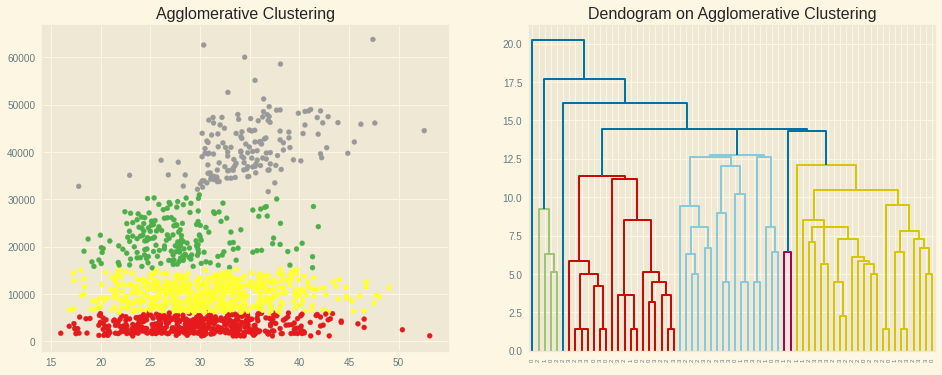

In [213]:
plt.style.use("Solarize_Light2")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))

ax1.scatter(X.values[:,0], X.values[:,1], c=agglomerative_clustering.labels_, cmap="Set1_r", s=25)
ax1.set_title("Agglomerative Clustering", fontsize=16)

dendrogram(linked,  
            orientation='top',
            labels=sample_agglomerative_clustering.labels_,
            distance_sort='descending',
            show_leaf_counts=False,
          ax=ax2)

ax2.set_title("Dendogram on Agglomerative Clustering")

plt.show()

# DBSCAN 

In [214]:
import numpy as np
import pandas as pd

# Plotly Packages
from plotly import subplots
import plotly.graph_objs as go

In [215]:
url = 'insurance.csv'
insurance_data = pd.read_csv(url)
insurance_data1 = insurance_data
insurance_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [216]:
insurance_data['chargesLog'] = np.log(insurance_data["charges"])

In [217]:
insurance_data['discretized_age'] = np.nan
data_list = [insurance_data]

for column in data_list:
    column.loc[(column['age'] >= 18) & (column['age'] <= 35), 'discretized_age'] = 'Young Adult'
    column.loc[(column['age'] > 35) & (column['age'] <= 55), 'discretized_age'] = 'Senior Adult'
    column.loc[column['age'] > 55, 'discretized_age'] = 'Elder'
    
    
# lig.show(renderer="colab")

In [218]:
insurance_data['discretized_bmi'] = np.nan
data_list = [insurance_data]

for column in data_list:
    column.loc[(column['bmi']) < 18.5, 'discretized_bmi'] = "Under Weight"
    column.loc[(column['bmi'] >= 18.5) & (column['bmi'] < 24.9), 'discretized_bmi'] = 'Healthy'
    column.loc[(column['bmi'] >= 25.0) & (column['bmi'] < 29.9), 'discretized_bmi'] = 'Over Weight'
    column.loc[column['bmi'] >= 30.0 , 'discretized_bmi'] = 'Obese'

In [219]:
replace_dict= {0:'female',1:'male'}
data = insurance_data.copy()
insurance_data['sex'] = insurance_data['sex'].map(dict(zip(['male','female'],[0,1])))
insurance_data['smoker'] = insurance_data['smoker'].map(dict(zip(['no','yes'],[0,1])))
insurance_data['region'] = insurance_data['region'].map(dict(zip(['southwest','southeast','northwest','northeast'],[1,2,3,4])))
insurance_data['discretized_age_0'] = insurance_data['discretized_age'].map(dict(zip(['Young Adult','Senior Adult','Elder'],[0,1,2])))

In [220]:
from sklearn.cluster import DBSCAN
X = insurance_data[["bmi","charges"]]
clustering = DBSCAN(eps=400, min_samples=2).fit(X)

In [221]:
labels = clustering.labels_
print(np.unique(labels))

[-1  0  1  2  3  4  5  6  7  8  9]


In [222]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 10
Estimated number of noise points: 11


In [223]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Silhouette Coefficient: 0.534


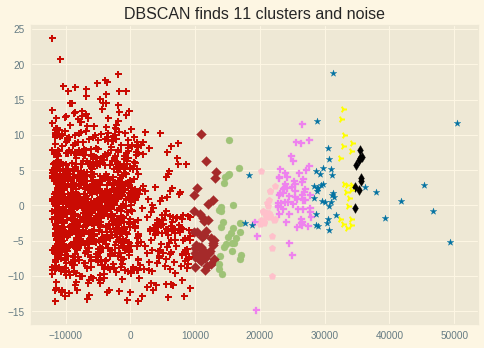

In [224]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as pl
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
for i in range(0, pca_2d.shape[0]):
  if labels[i] == 0:
    c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
  elif labels[i] == 1:
    c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
  elif labels[i] == -1:
    c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
  elif labels[i] == 2:
    c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='violet',marker='P')
  elif labels[i] == 3:
    c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='pink',marker='p')
  elif labels[i] == 4:
    c6 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='black',marker='d')
  elif labels[i] == 5:
    c7 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='brown',marker='D')
  elif labels[i] == 6:
    c8 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='yellow',marker='4')
  elif labels[i] == 7:
    c9 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
  elif labels[i] == 8:
    c10 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
  elif labels[i] == 9:
    c11 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='violet',marker='P')
 
#pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Cluster 3','Noise'])
pl.title('DBSCAN finds 11 clusters and noise')
pl.show()

# Linear Regression

In [225]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0
0,19,1,27.900,0,1,1,16884.92400,9.734176,Young Adult,Over Weight,0
1,18,0,33.770,1,0,2,1725.55230,7.453302,Young Adult,Obese,0
2,28,0,33.000,3,0,2,4449.46200,8.400538,Young Adult,Obese,0
3,33,0,22.705,0,0,3,21984.47061,9.998092,Young Adult,Healthy,0
4,32,0,28.880,0,0,3,3866.85520,8.260197,Young Adult,Over Weight,0


In [226]:
# 1st we handle the categorical variables by using dummy variables
import pandas as pd
import numpy as np

dum_df = pd.get_dummies(insurance_data1, columns=["sex","smoker","region"], prefix=["Sex_is","Is_a_smoker","Region_is"],drop_first=True )



In [227]:
dum_df.head()


,age,bmi,children,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0,Sex_is_1,Is_a_smoker_1,Region_is_2,Region_is_3,Region_is_4
0,19,27.900,0,16884.92400,9.734176,Young Adult,Over Weight,0,1,1,0,0,0
1,18,33.770,1,1725.55230,7.453302,Young Adult,Obese,0,0,0,1,0,0
2,28,33.000,3,4449.46200,8.400538,Young Adult,Obese,0,0,0,1,0,0
3,33,22.705,0,21984.47061,9.998092,Young Adult,Healthy,0,0,0,0,1,0
4,32,28.880,0,3866.85520,8.260197,Young Adult,Over Weight,0,0,0,0,1,0


In [228]:
#separate the other attributes from the predicting attribute
x = dum_df.drop(['charges','discretized_age','discretized_bmi','chargesLog'],axis=1)
#separte the predicting attribute into Y for model training 
#y =dum_df['charges']

In [229]:
x.head()

,age,bmi,children,discretized_age_0,Sex_is_1,Is_a_smoker_1,Region_is_2,Region_is_3,Region_is_4
0,19,27.900,0,0,1,1,0,0,0
1,18,33.770,1,0,0,0,1,0,0
2,28,33.000,3,0,0,0,1,0,0
3,33,22.705,0,0,0,0,0,1,0
4,32,28.880,0,0,0,0,0,1,0


In [230]:
y =dum_df['chargesLog']
y.head()

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: chargesLog, dtype: float64

In [231]:
# importing train_test_split from sklearn
import sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) 
#random_state ~ set.seed

In [232]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [233]:
y_prediction =  LR.predict(x_test)
# y_prediction

In [234]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is",score)
print("mean_sqrd_error is " ,mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 0.7887499495788656
mean_sqrd_error is  0.17770060103646354
root_mean_squared error of is 0.4215454910640885


In [235]:
# Our 1st (Multiple Linear Regression) model has a prediction accuracy of 78.74%

# Random Forest

In [236]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [237]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print("mean_sqrd_error is " ,mean_squared_error(y_test,y_prediction))
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mean_sqrd_error is  0.17770060103646354
Mean Absolute Error: 0.19 degrees.


In [238]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.91 %.


In [239]:
r2_test = r2_score(y_test, predictions)
print("R2 score of test set is {}".format(r2_test))

R2 score of test set is 0.8394493043762101


In [240]:
# On implementing the Random Forest Regressor we achieve an accuracy of 97.91% on Predicting the insurance charges

In [241]:
dum_df.head()

,age,bmi,children,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0,Sex_is_1,Is_a_smoker_1,Region_is_2,Region_is_3,Region_is_4
0,19,27.900,0,16884.92400,9.734176,Young Adult,Over Weight,0,1,1,0,0,0
1,18,33.770,1,1725.55230,7.453302,Young Adult,Obese,0,0,0,1,0,0
2,28,33.000,3,4449.46200,8.400538,Young Adult,Obese,0,0,0,1,0,0
3,33,22.705,0,21984.47061,9.998092,Young Adult,Healthy,0,0,0,0,1,0
4,32,28.880,0,3866.85520,8.260197,Young Adult,Over Weight,0,0,0,0,1,0


# Polynomial Regression

In [242]:
from sklearn.preprocessing import PolynomialFeatures
x = dum_df.drop(['charges','discretized_age','discretized_bmi'], axis = 1)
y = dum_df.chargesLog
pol = PolynomialFeatures (degree = 7)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

5.034166096850274
[-3.54277460e-08 -2.05434496e-08 -3.43293749e-09 ...  0.00000000e+00
  0.00000000e+00 -3.09585817e-11]
0.8364107243748987


In [243]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 0.11548092654285165
Mean Squared Error: 0.13737719063506934
Root Mean Squared Error: 0.3706442912484547


In [244]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

df

,Actual,Predicted
578,9.182407,9.182627
610,9.053417,9.053405
569,10.729898,11.570933
1034,9.468857,9.474718
198,9.174117,9.225671
...,...,...
1084,9.617122,9.615072
726,8.804578,8.804508
1132,9.938325,12.564766
725,10.619678,10.361967


In [245]:
r2_test = r2_score(y_test, y_test_pred)
print("R2 score of test set is {}".format(r2_test))

R2 score of test set is 0.8364107243748987


In [246]:
insurance_data1.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0
0,19,1,27.900,0,1,1,16884.92400,9.734176,Young Adult,Over Weight,0
1,18,0,33.770,1,0,2,1725.55230,7.453302,Young Adult,Obese,0
2,28,0,33.000,3,0,2,4449.46200,8.400538,Young Adult,Obese,0
3,33,0,22.705,0,0,3,21984.47061,9.998092,Young Adult,Healthy,0
4,32,0,28.880,0,0,3,3866.85520,8.260197,Young Adult,Over Weight,0


In [247]:
# insurance_data1 = insurance_data1.drop(['discretized_sex'],axis=1,inplace=True)


In [248]:
insurance_data1['discretized_age'] = np.nan
data_list = [insurance_data1]

for column in data_list:
    column.loc[(column['age'] >= 18) & (column['age'] <= 35), 'discretized_age'] = 'Young Adult'
    column.loc[(column['age'] > 35) & (column['age'] <= 55), 'discretized_age'] = 'Senior Adult'
    column.loc[column['age'] > 55, 'discretized_age'] = 'Elder'

In [249]:
insurance_data1.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0
0,19,1,27.900,0,1,1,16884.92400,9.734176,Young Adult,Over Weight,0
1,18,0,33.770,1,0,2,1725.55230,7.453302,Young Adult,Obese,0
2,28,0,33.000,3,0,2,4449.46200,8.400538,Young Adult,Obese,0
3,33,0,22.705,0,0,3,21984.47061,9.998092,Young Adult,Healthy,0
4,32,0,28.880,0,0,3,3866.85520,8.260197,Young Adult,Over Weight,0


In [250]:
insurance_data1['discretized_bmi'] = np.nan
data_list = [insurance_data1]
for column in data_list:
    column.loc[(column['bmi']) < 18.5, 'discretized_bmi'] = "Underweight"
    column.loc[(column['bmi'] >= 18.5) & (column['bmi'] < 24.9), 'discretized_bmi'] = 'Healthy'
    column.loc[(column['bmi'] >= 25.0) & (column['bmi'] < 29.9), 'discretized_bmi'] = 'Overweight'
    column.loc[column['bmi'] >= 30.0 , 'discretized_bmi'] = 'Obese'

In [251]:
insurance_data1['discretized_children'] = np.nan
data_list = [insurance_data1]

for column in data_list:
    column.loc[(column['children']) ==0, 'discretized_children'] = "No child"
    column.loc[(column['children']) == 1, 'discretized_children'] = "1 child"
    column.loc[(column['children']) == 2, 'discretized_children'] = "2 child"
    column.loc[column['children'] >= 3 , 'discretized_children'] = "3 or more children"

In [252]:
insurance_data1['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [253]:
insurance_data1['discretized_charges'] = np.nan
data_list = [insurance_data1]

for column in data_list:
    column.loc[(column['charges']) <= 8.4, 'discretized_charges'] = "Low Premium"
    column.loc[(column['charges'] >= 8.4) & (column['charges'] <= 9.7) , 'discretized_charges'] = "Normal Premium"
    column.loc[(column['charges']) >9.7, 'discretized_charges'] = "High Premium"

In [254]:
insurance_data1 = pd.get_dummies(insurance_data1, columns=["sex","smoker","region"], prefix=["Sex_is","Is_a_smoker","Region_is"] )


In [255]:
insurance_data1 = pd.get_dummies(insurance_data1, columns=["discretized_children","discretized_charges","discretized_bmi","discretized_age"], prefix=["No_of_children","Type_of_charges","BMI_category","Age_category"])


In [256]:
insurance_data

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0,discretized_children,discretized_charges
0,19,1,27.900,0,1,1,16884.92400,9.734176,Young Adult,Overweight,0,No child,High Premium
1,18,0,33.770,1,0,2,1725.55230,7.453302,Young Adult,Obese,0,1 child,High Premium
2,28,0,33.000,3,0,2,4449.46200,8.400538,Young Adult,Obese,0,3 or more children,High Premium
3,33,0,22.705,0,0,3,21984.47061,9.998092,Young Adult,Healthy,0,No child,High Premium
4,32,0,28.880,0,0,3,3866.85520,8.260197,Young Adult,Overweight,0,No child,High Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830,9.268661,Senior Adult,Obese,1,3 or more children,High Premium
1334,18,1,31.920,0,0,4,2205.98080,7.698927,Young Adult,Obese,0,No child,High Premium
1335,18,1,36.850,0,0,2,1629.83350,7.396233,Young Adult,Obese,0,No child,High Premium
1336,21,1,25.800,0,0,1,2007.94500,7.604867,Young Adult,Overweight,0,No child,High Premium


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning:

Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.



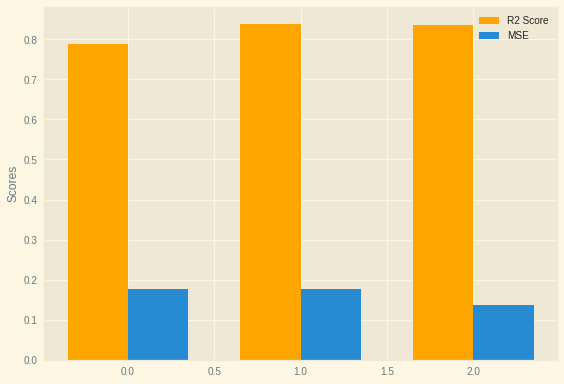

In [257]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Linear Regression', 'Random Forest', 'Polynomial Regression']
men_means = [0.7887, 0.8394, 0.8364]
women_means = [0.1777,0.1777,0.1373]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='R2 Score',color="orange")
rects2 = ax.bar(x + width/2, women_means, width, label='MSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xticks(x, labels)
ax.legend()


fig.tight_layout()

plt.show()

# Association Analysis

In [258]:
url = 'insurance.csv'
insurance_data_set = pd.read_csv(url)
#insurance_data1 = insurance_data
insurance_data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [259]:
insurance_data_set['charges'] = np.log(insurance_data_set["charges"])
insurance_data_set['charges'].describe()

count    1338.000000
mean        9.098659
std         0.919527
min         7.022756
25%         8.463853
50%         9.146552
75%         9.719558
max        11.063045
Name: charges, dtype: float64

In [260]:
insurance_data_set['discretized_age'] = np.nan
data_list = [insurance_data_set]
for column in data_list:
    column.loc[(column['age'] >= 18) & (column['age'] <= 35), 'discretized_age'] = 'Young Adult'
    column.loc[(column['age'] > 35) & (column['age'] <= 55), 'discretized_age'] = 'Senior Adult'
    column.loc[column['age'] > 55, 'discretized_age'] = 'Elder'

In [261]:
insurance_data_set['discretized_bmi'] = np.nan
data_list = [insurance_data_set]

for column in data_list:
    column.loc[(column['bmi']) < 18.5, 'discretized_bmi'] = "Underweight"
    column.loc[(column['bmi'] >= 18.5) & (column['bmi'] < 24.9), 'discretized_bmi'] = 'Healthy'
    column.loc[(column['bmi'] >= 25.0) & (column['bmi'] < 29.9), 'discretized_bmi'] = 'Overweight'
    column.loc[column['bmi'] >= 30.0 , 'discretized_bmi'] = 'Obese' 

In [262]:
insurance_data_set['discretized_children'] = np.nan
data_list = [insurance_data_set]

for column in data_list:
    column.loc[(column['children']) ==0, 'discretized_children'] = "No child"
    column.loc[(column['children']) == 1, 'discretized_children'] = "1 child"
    column.loc[(column['children']) == 2, 'discretized_children'] = "2 child"
    column.loc[column['children'] >= 3 , 'discretized_children'] = "3 or more children" 

In [263]:
insurance_data_set['discretized_charges'] = np.nan
data_list = [insurance_data_set]

for column in data_list:
    column.loc[(column['charges']) <= 8.4, 'discretized_charges'] = "Low Premium"
    column.loc[(column['charges'] >= 8.4) & (column['charges'] <= 9.7) , 'discretized_charges'] = "Normal Premium"
    column.loc[(column['charges']) >9.7, 'discretized_charges'] = "High Premium" 

In [264]:
insurance_data_set=insurance_data_set.drop(['age','bmi','children'],1)
insurance_data_set=insurance_data_set.drop(['charges'],1) 

In [265]:
insurance_data_set = pd.get_dummies(insurance_data_set, columns=["sex","smoker","region"], prefix=["Sex_is","Is_a_smoker","Region_is"] )
 
insurance_data_set = pd.get_dummies(insurance_data_set, columns=["discretized_children","discretized_charges","discretized_bmi","discretized_age"], prefix=["No_of_children","Type_of_charges","BMI_category","Age_category"])


In [266]:
# Replacing 1 with True and 0 with False
insurance_data_set.replace({0 : False,1: True}, inplace=True)


In [267]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets= apriori(insurance_data_set,min_support=0.3,use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.494768,(Sex_is_female)
1,0.505232,(Sex_is_male)
2,0.795217,(Is_a_smoker_no)
3,0.428999,(No_of_children_No child)
4,0.516442,(Type_of_charges_Normal Premium)
5,0.528401,(BMI_category_Obese)
6,0.409567,(Age_category_Senior Adult)
7,0.428999,(Age_category_Young Adult)
8,0.408819,"(Sex_is_female, Is_a_smoker_no)"
9,0.386398,"(Sex_is_male, Is_a_smoker_no)"


In [274]:
from mlxtend.frequent_patterns import association_rules

res=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.6)
res


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sex_is_female),(Is_a_smoker_no),0.494768,0.795217,0.408819,0.826284,1.039068,0.015371,1.178839
1,(Sex_is_male),(Is_a_smoker_no),0.505232,0.795217,0.386398,0.764793,0.961741,-0.015371,0.870651
2,(No_of_children_No child),(Is_a_smoker_no),0.428999,0.795217,0.343049,0.799652,1.005577,0.001903,1.022136
3,(Type_of_charges_Normal Premium),(Is_a_smoker_no),0.516442,0.795217,0.504484,0.976845,1.228401,0.093801,8.844077
4,(Is_a_smoker_no),(Type_of_charges_Normal Premium),0.795217,0.516442,0.504484,0.634398,1.228401,0.093801,1.322636
5,(BMI_category_Obese),(Is_a_smoker_no),0.528401,0.795217,0.420030,0.794908,0.999612,-0.000163,0.998495
6,(Age_category_Senior Adult),(Is_a_smoker_no),0.409567,0.795217,0.325112,0.793796,0.998213,-0.000582,0.993108
7,(Age_category_Young Adult),(Is_a_smoker_no),0.428999,0.795217,0.338565,0.789199,0.992432,-0.002582,0.971451


In [279]:
frequent_itemsets1= apriori(insurance_data_set,min_support=0.3,use_colnames=True)
frequent_itemsets1


,support,itemsets
0,0.494768,(Sex_is_female)
1,0.505232,(Sex_is_male)
2,0.795217,(Is_a_smoker_no)
3,0.428999,(No_of_children_No child)
4,0.516442,(Type_of_charges_Normal Premium)
5,0.528401,(BMI_category_Obese)
6,0.409567,(Age_category_Senior Adult)
7,0.428999,(Age_category_Young Adult)
8,0.408819,"(Sex_is_female, Is_a_smoker_no)"
9,0.386398,"(Sex_is_male, Is_a_smoker_no)"


In [280]:
res1=association_rules(frequent_itemsets1,metric="confidence",min_threshold=0.8)
res1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sex_is_female),(Is_a_smoker_no),0.494768,0.795217,0.408819,0.826284,1.039068,0.015371,1.178839
1,(Type_of_charges_Normal Premium),(Is_a_smoker_no),0.516442,0.795217,0.504484,0.976845,1.228401,0.093801,8.844077
